In [29]:
# Import Statement

import numpy as np
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
from sklearn import svm
from matplotlib import pyplot as plt
from PIL import Image
from scipy import misc
from scipy import ndimage

import cv2
np.set_printoptions(threshold=np.nan)

In [3]:
# Data Loading

train_x = np.load('./data/train_images.npy', encoding='latin1')
train_x = train_x[:,1]
train_y = pd.read_csv('./data/train_labels.csv', encoding='latin-1')
train_y = np.asarray(train_y['Category']) # To access labels: train_y[index]

test_x = np.load('./data/test_images.npy', encoding='latin1')
test_x = test_x[:,1]

print("Data loaded.")

Data loaded.


In [4]:
#train_x = train_x.reshape(10000,1)
#test_x = test_x.reshape(10000,1)
print(train_x.shape)

(10000,)


In [5]:
t = (train_x[0].reshape(100,100))
t2 = np.ndarray(shape=(10,10), dtype=float, order='F')

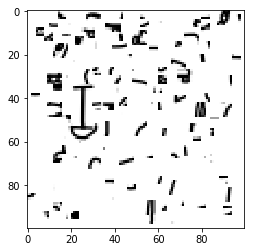

In [6]:
plt.imshow(t, cmap='Greys')
plt.show()

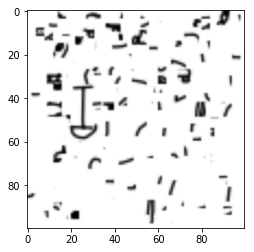

In [7]:
plt.imshow(t, cmap='Greys', interpolation='gaussian')
plt.show()

In [39]:
med_denoised = ndimage.median_filter(t, 3)
gauss_denoised = ndimage.gaussian_filter(t, 2)

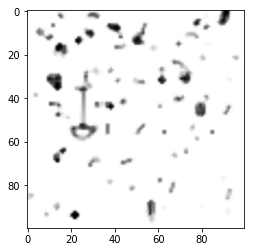

In [37]:
plt.imshow(med_denoised, cmap='Greys', interpolation='gaussian')
plt.show()

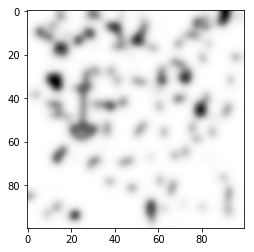

In [40]:
plt.imshow(gauss_denoised, cmap='Greys', interpolation='gaussian')
plt.show()

In [43]:
sx = ndimage.sobel(med_denoised, axis=0, mode='constant')
sy = ndimage.sobel(med_denoised, axis=1, mode='constant')
sob = np.hypot(sx, sy)

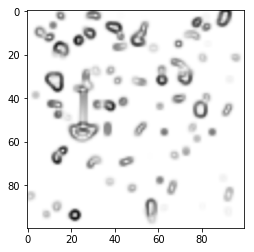

In [44]:
plt.imshow(sob, cmap='Greys', interpolation='gaussian')
plt.show()

In [59]:
open_square = ndimage.binary_opening(t)
eroded_square = ndimage.binary_erosion(t)
reconstruction = ndimage.binary_propagation(eroded_square, mask=t)

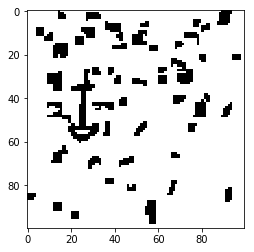

In [62]:
plt.imshow(reconstruction, cmap='Greys')
plt.show()

In [61]:
reconstruction

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False,  True,
         True,  True,  True,  True, False, False, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False,  True,  True,  True, False,
        False, False, False, False, False, False, False, Fals